In [3]:

import pandas as pd
import re
import functions
import pymysql
import sqlalchemy as alch
from dotenv import load_dotenv
import os
import warnings
warnings.filterwarnings("ignore")
import pycountry_convert as pc
import seaborn as sns

import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression

In [14]:
wrl= pd.read_csv("wrl_renew.csv")
main= pd.read_csv("main.csv")
growth= pd.read_csv("growth.csv")

In [15]:
wrl.sample()

,ENTITY,ISO,YEAR,RENEWABLE ENERGY %,RENEWABLE ENERGY TWh
18,World,WRL,1983,6.925,68.018


In [8]:
wrl.dtypes

ENTITY                          object
ISO                             object
YEAR                    datetime64[ns]
RENEWABLE ENERGY %             float64
RENEWABLE ENERGY TWh           float64
dtype: object

In [10]:
wrl.sample()

,ENTITY,ISO,YEAR,RENEWABLE ENERGY %,RENEWABLE ENERGY TWh
20,World,WRL,1985-01-01,6.813,77.792


In [24]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (30.,10.)})
sns.set_style("whitegrid") 

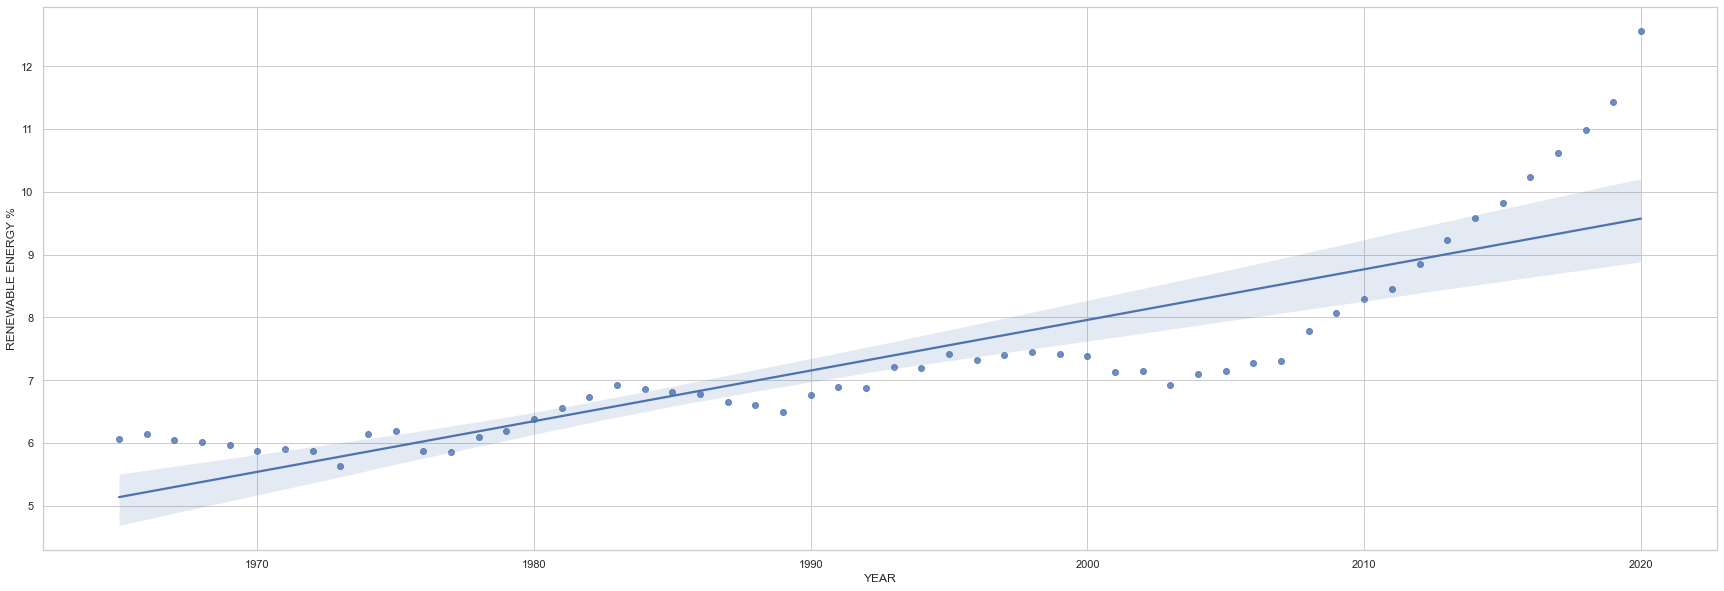

In [25]:
sns.regplot(x="YEAR", y="RENEWABLE ENERGY %", data=wrl);

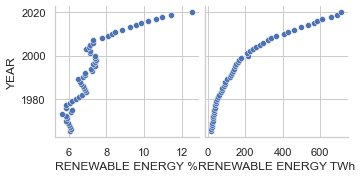

In [26]:
sns.pairplot(wrl,y_vars='YEAR',x_vars=('RENEWABLE ENERGY %','RENEWABLE ENERGY TWh'));

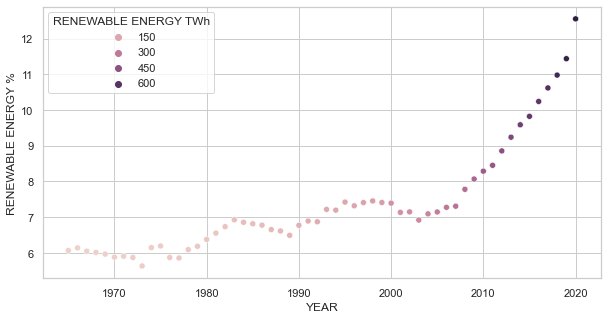

In [36]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,5.)})
sns.set_style("whitegrid") 
sns.scatterplot(data=wrl,x='YEAR',y_bins=10,y='RENEWABLE ENERGY %',hue='RENEWABLE ENERGY TWh');

In [39]:
wrl.columns

Index(['ENTITY', 'ISO', 'YEAR', 'RENEWABLE ENERGY %', 'RENEWABLE ENERGY TWh'], dtype='object')

In [38]:
wrl.rolling(window=12)

Rolling [window=12,center=False,axis=0,method=single]

In [51]:
wrl_test=wrl[['YEAR','RENEWABLE ENERGY %']]

In [73]:
wrl_test.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, '%')

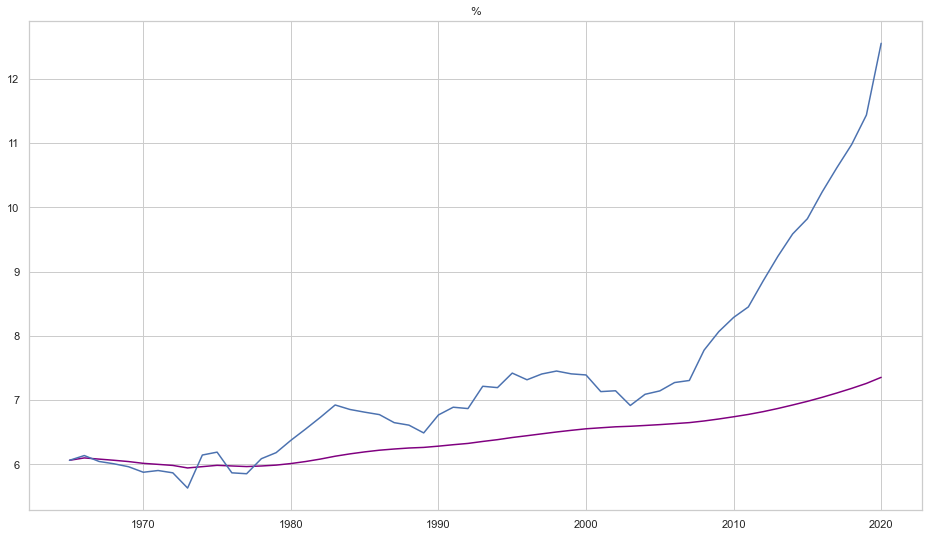

In [96]:
wrl_test2.rolling(window=12)
plt.plot(wrl_test2.expanding().mean(), c="purple", label="expanding window")
plt.plot(wrl_test2)
plt.title("%")




In [88]:
wrl_test2 = wrl_test.set_index('YEAR')

In [90]:
wrl_test2

,RENEWABLE ENERGY %
YEAR,
1965,6.064
1966,6.138
1967,6.046
1968,6.010
1969,5.964
1970,5.878
1971,5.905
1972,5.869
1973,5.632


In [7]:
wrl['YEAR'] = pd.to_datetime(wrl['YEAR'], format='%Y')